# Beam model to correct for sensitivity of CHIME: FRB event 71784510 

Import necessary Python modules, FRB models and data

In [1]:
#modules from cascade
import iautils#intensity analysis utilities 
import matplotlib.pyplot as plt
import numpy as np

#beam model
from frb_common import beam_model

No module named '_version'


In [2]:
#line-oriented python magic function making plot outputs appear and be stored within the notebook
%matplotlib inline

In [3]:
# Initiate beam model object
bm = beam_model.current_model_class(beam_model.current_config)

In [4]:
#read in processed data of event from frb-archiver
fname = "/data/frb-archiver/2020/02/04/astro_71784510/intensity/processed/intensity-dm-pipeline/71784510_cascade.npz"
casc = iautils.cascade.load_cascade_from_file(fname)

Preprocessing...
using weights
Preprocessing...
using weights
Preprocessing...
using weights
Preprocessing...
using weights
Preprocessing...
using weights
Preprocessing...
using weights
Preprocessing...
using weights
Preprocessing...
using weights
Preprocessing...
using weights
Preprocessing...
using weights
Preprocessing...
using weights
Preprocessing...
using weights


Get attributes of beam for specific event 

In [5]:
#cascade object is a class to hold multiple dynamic spectra 
# attribute max_beam is beam that has max SNR, define the following
main_beam_spec = casc.max_beam

In [6]:
#id number of beam
beam_id = np.array([169]) 
#freqencies to be analyzied by beam model in spectra of FRB
freq = np.array(main_beam_spec.frequencies)

# get center of beam `beam_id` at a radio frequency of `freq` MHz
beam_centre = bm.get_beam_positions(beam_id,freq)[0][0]

#get x and y from RA and DEC of FRB source R3
ra_r3, dec_r3 = 29.503125, 65.716756
x, y = bm.get_position_from_equatorial(ra_r3,dec_r3,casc.event_time)

# get sensitivity at position `x`, `y` for beam `beam_id` at a radio frequency of `freq` MHz
sens= bm.get_sensitivity(beam_id,np.array([x,y]),freq)[0][0]

#print out center of beam and sensitivity array 
print(beam_centre, sens)

[-0.4        16.45216222] [0.78710872 0.77319792 0.75515847 ... 0.68150629 0.6727562  0.66033187]


Manipulate sensitivity array

In [7]:
#get inverse of sensitivity matrix so it can be multiplied by intensity array to divide out sensitivity 
for i in range (0,1023):
    sens[i]=(1/sens[i])

Plot original event

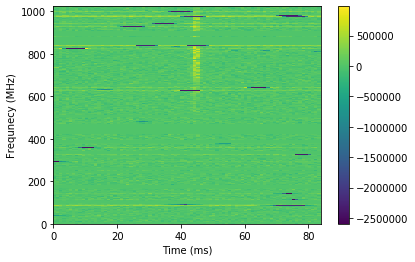

In [8]:
#Create contour plot of FRB not corrected for sensitivity 
plt.pcolormesh(main_beam_spec.intensity)

plt.xlabel("Time (ms)")
plt.ylabel("Frequnecy (MHz)")
plt.colorbar()

plt.savefig('original_71784510 .PDF')

Calculate corrected array of intensity including sensitivity and plot corrected event

In [9]:
#define new corrected array 'corr'  

for i in range (0,83):#every element in the original intensity array is divided by its corresponding sensitivity 
    main_beam_spec.intensity[:,i]=(main_beam_spec.intensity[:,i])*sens

corr=main_beam_spec.intensity

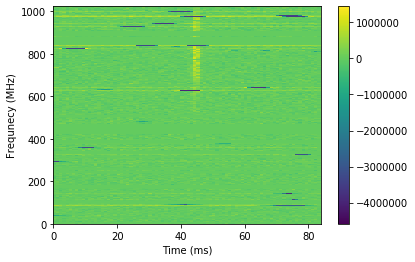

In [10]:
#Create contour plot of FRB corrected with beam sensitivity 
plt.pcolormesh(corr)

plt.xlabel("Time (ms)")
plt.ylabel("Frequnecy (MHz)")
plt.colorbar()

plt.savefig('corrected_71784510 .PDF')